In [1]:
import numpy as np
import tensorflow as tf

In [7]:
# 입력 이미지의 형태 
# (이미지의 개수, height, width, channel) > 4차원 데이터
# (1, 3, 3, 1)
img = np.array([[[[1],[2],[3]],
                 [[4],[5],[6]],
                 [[7],[8],[9]]]], dtype=np.float32)
print(img.shape)

# filter(kernel)의 형태 
# (filter height, filter width, filter channel, filter 개수)
# (2, 2, 1, 1)
weight = np.array([[[[1]],[[1]]],
                   [[[1]],[[1]]]], dtype=np.float32)
print(weight.shape)

# stride의 형태 (가로, 세로)
# (1, 1)
# padding 처리 : valid (padding 처리를 하지 않는다)

conv2d = tf.nn.conv2d(img, weight, strides=[1,1,1,1], padding='VALID')

sess = tf.Session()
result = sess.run(conv2d)
print('feature map :\n{}'.format(result))
# convolution의 결과
# (이미지 개수, height, width, channel)
# channel은 filter의 개수와 같다
# (1, 2, 2, 1)
print(result.shape)

(1, 3, 3, 1)
(2, 2, 1, 1)
feature map :
[[[[12.]
   [16.]]

  [[24.]
   [28.]]]]
(1, 2, 2, 1)


In [8]:
# 입력 이미지의 형태 
# (이미지의 개수, height, width, channel) > 4차원 데이터
# (1, 3, 3, 3)
img = np.array([[[[1,2,3],[1,2,3],[1,2,3]],
                 [[1,2,3],[1,2,3],[1,2,3]],
                 [[1,2,3],[1,2,3],[1,2,3]]]], dtype=np.float32)
print(img.shape)

# filter(kernel)의 형태 
# (filter height, filter width, filter channel, filter 개수)
# (2, 2, 3, 2)
weight = np.array([[[[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1]]],
                   [[[1,1],[1,1],[1,1]],[[1,1],[1,1],[1,1]]]], dtype=np.float32)
print(weight.shape)

# stride의 형태 (가로, 세로)
# (1, 1)
# padding 처리 : valid (padding 처리를 하지 않는다)

conv2d = tf.nn.conv2d(img, weight, strides=[1,1,1,1], padding='VALID')

sess = tf.Session()
result = sess.run(conv2d)
print('feature map :\n{}'.format(result))
# convolution의 결과
# (이미지 개수, height, width, channel)
# channel은 filter의 개수와 같다
# (1, 2, 2, 2)
print(result.shape)

(1, 3, 3, 3)
(2, 2, 3, 2)
feature map :
[[[[24. 24.]
   [24. 24.]]

  [[24. 24.]
   [24. 24.]]]]
(1, 2, 2, 2)


# 실제 이미지를 이용한 Convolution

In [10]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as img

적용할 filter의 크기 : (3, 3, 1, 1)
convolution 결과 형태 : (1, 427, 638, 1)


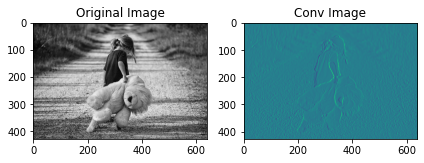

In [57]:
figure = plt.figure()
fig_1 = figure.add_subplot(1,2,1)
fig_2 = figure.add_subplot(1,2,2)

ori_image = img.imread('../data/img/girl-teddy.jpg')
fig_1.set_title('Original Image')
fig_1.imshow(ori_image)

# 데이터 형태 변환  (429, 640, 3) > (1, 429, 640, 3)
imput_img = ori_image.reshape((1,) + ori_image.shape)

# 실수형으로 변환
imput_img = imput_img.astype(np.float32)

# 1 channel로 변환
channel_1_imput_img = imput_img[:,:,:,0:1]

# filter
# (3, 3, 1, 1)
weight = np.array([[[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]],
                   [[[-1]],[[0]],[[1]]]], dtype=np.float32)
print('적용할 filter의 크기 : {}'.format(weight.shape))

# stride = 1
# padding = VALID

conv2d = tf.nn.conv2d(channel_1_imput_img, weight, 
                      strides=[1,1,1,1], padding='VALID')
sess = tf.Session()
result = sess.run(conv2d)
print('convolution 결과 형태 : {}'.format(result.shape))

# (1, 427, 638, 1) > (427, 638, 1) 변환
result_image = result[0,:,:,:]
fig_2.set_title('Conv Image')
fig_2.imshow(result_image)

figure.tight_layout()
plt.show()